1. Spliting into training set, testing set and validation set (never be touched until finishing all of things)

2. Using logspace to choose alpha first, then using linspace

3. Data engineering: using year and month to compute the used time

4. Feedback: allow user input the price when they selled their cars and use 0.95 (or other values) to weight the past data

5. Predicting with different regions: use postalCode feature split data

6. Weakness: do not own the origin price of used cars, which can be improved by future web app

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
%matplotlib inline

In [67]:
df = pd.read_csv('../../Desktop/autos.csv')
features = df.columns.values

In [3]:
features

array(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'], dtype=object)

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df['model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '

In [6]:
df.columns.values

array(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'], dtype=object)

In [7]:
df[(df.powerPS <= 30) & (df.powerPS >= 2)]['powerPS'].count()

924

In [8]:
np.sort(df.kilometer.unique())

array([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 125000, 150000])

In [9]:
len(df)

371528

## How mass the dataset is

In [10]:
df[df['yearOfRegistration'] > 2016].head(1)
# 22 row is 2018 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
22,2016-03-23 14:52:51,Opel_Meriva_1.Hand_T�V_3.2018,privat,Angebot,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein,2016-03-23 00:00:00,0,49716,2016-03-31 01:16:33


In [11]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [12]:
df[df['price'] < 10].head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [13]:
df[df['price'] > 1e6].head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
14663,2016-04-03 06:03:56,Tausch_moeglich_Polo_vw_n9,privat,Angebot,11111111,control,coupe,2003,manuell,64,polo,150000,2,benzin,volkswagen,NaN,2016-04-03 00:00:00,0,46535,2016-04-07 10:16:51
20143,2016-03-18 00:55:53,Porsche_911R_Einer_von_911,privat,Angebot,1250000,test,coupe,2016,manuell,500,911,5000,3,benzin,porsche,nein,2016-03-17 00:00:00,0,70435,2016-03-20 04:48:27
20746,2016-03-08 15:54:52,Golf3_Schlachtfest,privat,Angebot,12345678,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-08 00:00:00,0,18516,2016-03-17 16:15:43
21467,2016-03-19 19:45:02,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,privat,Angebot,9999999,control,coupe,1967,manuell,215,911,50000,10,benzin,porsche,nein,2016-03-19 00:00:00,0,70435,2016-04-01 10:45:30
39625,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,privat,Angebot,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,0,14542,2016-04-06 23:17:31


## Data cleaning and Data engineering

Data Engineering: use the feature 'yearOfRegistration' and 'monthOfRegistration' to feature 'used_month'

In [68]:
df['used_month'] = (2017 - df['yearOfRegistration']) * 12 + (4 - df['monthOfRegistration'])
features = df.columns.values
features

array(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen', 'used_month'], dtype=object)

I do not believe that the features is useful, which contain 'dateCrawled', 'name', 'monthOfRegistration', 'dateCreated', 'postalCode' (which will be useful when applying Google map API) and 'lastSeen'.

I do not know the meaning of 'abtest', 'offerType'.

I cannot deal with the features with many categories, which are 'brand', 'model' , 'vehicleType'

Feature Seller only has two kinds of variables and 'gewerblich' only appears twice

In [69]:
# Choose 'seller', 'price', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer' and 'notRepairedDamage' for analysis
dd_df = df.drop_duplicates(features[i] for i in [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15])
dd_df = dd_df[['price', 'used_month', 'gearbox', 'powerPS', 'kilometer', 'notRepairedDamage', 'fuelType']]


In [70]:
dd_df = dd_df[(dd_df.price >= 10)
            & (dd_df.price <= 1e6)
            & (dd_df.used_month >= 0)
            & (dd_df.used_month <= 500)
            & (dd_df.powerPS >= 30)
            & (dd_df.powerPS <= 800)]

In [71]:
float(len(dd_df)) / float(len(df))

0.8180621648973967

In [72]:
dd_df['notRepairedDamage'].fillna('nRD_unknown', inplace=True)

In [73]:
dd_df['gearbox'].fillna('gear_unknown', inplace=True)

In [74]:
dd_df['fuelType'].fillna('fueltype_unknown', inplace=True)

Gearbox contains three variables: 'manuell', 'automatik' and 'unknown'.

NotRepairedDamage contains three variables: 'ja', 'unknown' and 'nein'

So we use pd.get_dummies() to deal with these discrete features

In [75]:
dd_df_gearbox = pd.get_dummies(dd_df['gearbox'])
dd_df_notRepairedDamage = pd.get_dummies(dd_df['notRepairedDamage'])
dd_df_fuelType = pd.get_dummies(dd_df['fuelType'])

In [76]:
dd_df_fuelType.head()

,andere,benzin,cng,diesel,elektro,fueltype_unknown,hybrid,lpg
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0


In [77]:
dd_df = pd.concat([dd_df.drop(['gearbox', 'notRepairedDamage', 'fuelType'], axis=1), dd_df_gearbox, 
                   dd_df_notRepairedDamage, dd_df_fuelType], axis=1)

In [78]:
dd_df.head()

,price,used_month,powerPS,kilometer,automatik,gear_unknown,manuell,ja,nRD_unknown,nein,andere,benzin,cng,diesel,elektro,fueltype_unknown,hybrid,lpg
1,18300,71,190,125000,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,9800,152,163,125000,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1500,190,75,150000,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,3600,105,69,90000,0,0,1,0,0,1,0,0,0,1,0,0,0,0
5,650,258,102,150000,0,0,1,1,0,0,0,1,0,0,0,0,0,0


## Data visualization

In [79]:
corr = dd_df.corr()

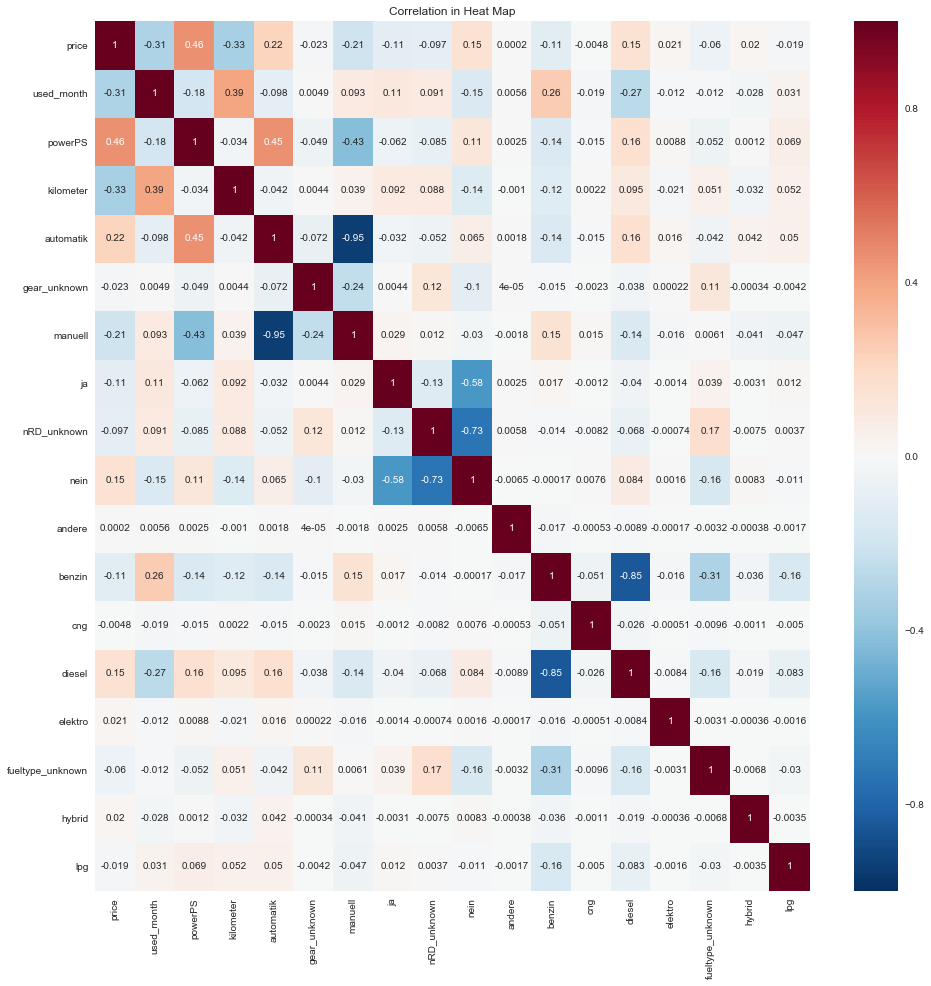

In [80]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True)
plt.title('Correlation in Heat Map')

Notice that the manuell in gearbox feature have a strong relationship with automatik in gearbox feature. (It makes sense because there are only two kinds of gearbox and there is few NaN in gearbox feature)

So we decide delete one of them and we choose manuell

In [81]:
dd_df = dd_df.drop(['manuell'], axis=1)

## Ridge Regression

Split into training set, testing set and validation set

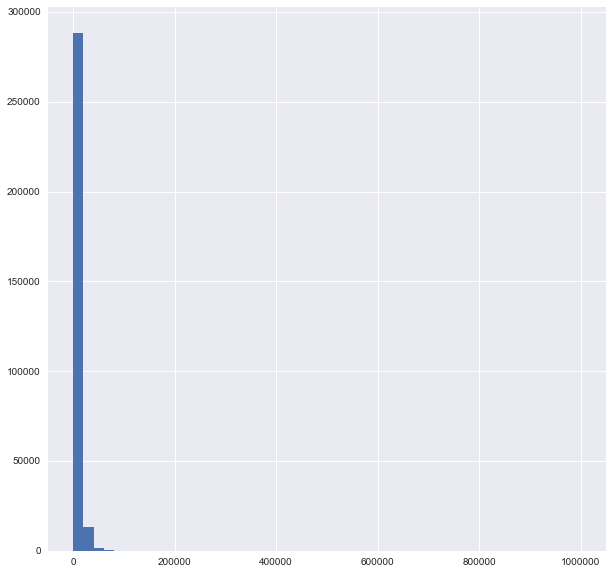

In [94]:
X = dd_df.drop(['price'], axis=1, inplace=False)
y = dd_df['price']
plt.figure(figsize=(10, 10))
y.hist(grid=True, bins=50)

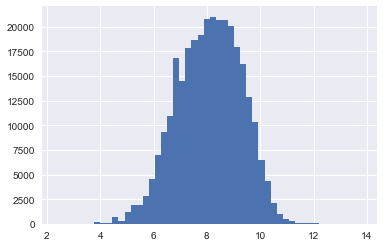

In [95]:
y = np.log1p(y)
y.hist(grid=True, bins=50)

In [62]:
val_size = 0.05

state = 20
experiment_X, validation_X, experiment_y, validation_y = train_test_split(X, y, test_size=val_size, random_state = state)

In [63]:
test_size = 0.2
training_X, testing_X, training_y, testing_y = train_test_split(experiment_X,  experiment_y,test_size=test_size, random_state = state)


In [37]:
alphas = np.logspace(-6, -4, 100)
scores = []
for alpha in alphas:
    opt_regr = Ridge(alpha=alpha)
    opt_regr.fit(training_X, training_y)
    scores.append(opt_regr.score(testing_X, testing_y))
scores = np.array(scores)
print alphas[scores.argmax()]
print max(scores)

1e-06
0.677145508025


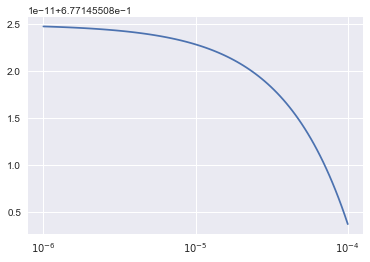

In [38]:
plt.semilogx(alphas, scores)

In [64]:
regr = RidgeCV(cv=5, alphas=[0.0001, 0.001, 0.01, 0.1, 1])
regr.fit(experiment_X, experiment_y)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1], cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [65]:
regr.score(experiment_X, experiment_y)

0.67656672280916119

In [66]:
regr.alpha_

1

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(training_X, training_y)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.5min finished


In [36]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(training_X, training_y)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(testing_X, testing_y))

Score: 0.80
